In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'

In [2]:
sams=pd.read_csv("sams_after_cutoff_04102024.csv")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Primary vs. Advanced
Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:7.639e-01 U_stat=2.543e+04
Advanced
Untreated vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:4.767e-01 U_stat=3.810e+04
Primary vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.718e-01 U_stat=8.728e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Primary vs. Advanced
Untreated: Mann-Whitney-Wilcoxon test two-sided, P_val:8.422e-01 U_stat=1.879e+04
Advanced
Untreated vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.391e-01 U_stat=2.202e+04
Primary vs. Advanced
Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:8.032e-02 U_stat=6.285e+04


Text(1.77, 0.8, '(N=419)')

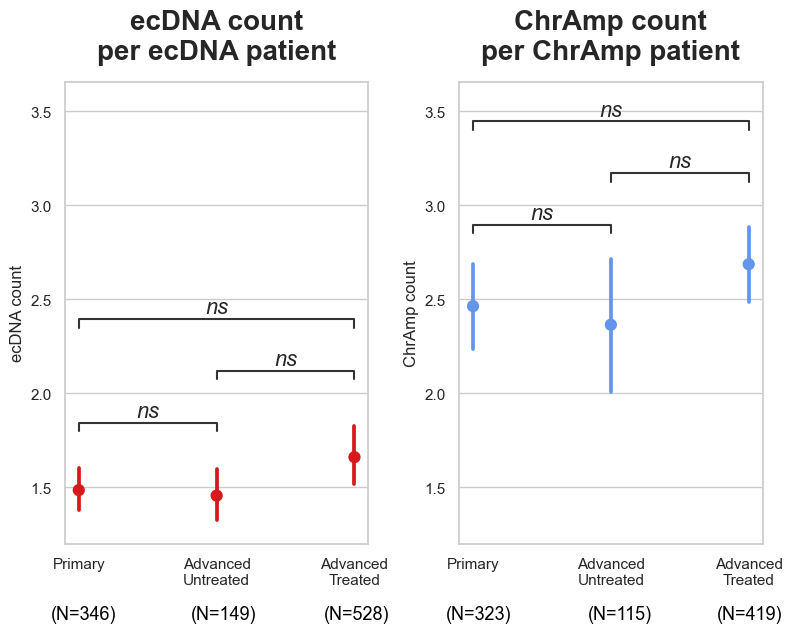

<Figure size 500x670 with 0 Axes>

<Figure size 500x670 with 0 Axes>

In [3]:
fig = plt.figure(figsize=(9, 6))

gs = fig.add_gridspec(1, 2, width_ratios=[1,1])
gs.update(wspace=0.3)

ax2 = plt.subplot(gs[0, 1])
ax2.set(ylim=(0.25, 1.5))
ax1 = plt.subplot(gs[0, 0], sharey=ax2)

# FIRST
sns.set(font="Arial",font_scale=1.3,style="whitegrid")
plt.figure(figsize=(5,6.7))

plt.rcParams["font.style"] = "italic"
data=sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')&(sams['sample_classification']=='ecDNA')]

x='any_pretreatment'
y='ecDNA_count'

pairs=[('Primary','Advanced\nUntreated'),('Primary','Advanced\nTreated'),('Advanced\nTreated','Advanced\nUntreated')]
order=['Primary','Advanced\nUntreated','Advanced\nTreated']

sns.pointplot(ax=ax1, data=data, x=x, y=y,order=order,join=False,palette=['#D7191C'])
ax1.set(ylim=(1.2,3.5))

annot=Annotator(ax1, pairs, data=data, x=x, y=y,order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()
plt.rcParams["font.style"] = "normal"

ax1.set_ylabel('ecDNA count',fontstyle='normal')
ax1.set_xlabel(None)

ax1.set_title("ecDNA count\nper ecDNA patient",fontweight='bold',fontstyle='normal',fontsize=20,y=1.03)
ax1.text(-0.2,0.8,'(N=346)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(0.81,0.8,'(N=149)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax1.text(1.78,0.8,'(N=528)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')


# SECOND
sns.set(font="Arial",font_scale=1.3,style="whitegrid")
plt.figure(figsize=(5,6.7))

plt.rcParams["font.style"] = "italic"
data=sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')&(sams['sample_classification']=='ChrAmp')]

x='any_pretreatment'
y='Non-ecDNA_count'

pairs=[('Primary','Advanced\nUntreated'),('Primary','Advanced\nTreated'),('Advanced\nTreated','Advanced\nUntreated')]
order=['Primary','Advanced\nUntreated','Advanced\nTreated']

sns.pointplot(ax=ax2,data=data, x=x, y=y,order=order,join=False,palette=['#6495ED'])

annot=Annotator(ax2, pairs, data=data, x=x, y=y,order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()
sns.set(font="Arial",font_scale=1.3,style="whitegrid")

plt.rcParams["font.style"] = "normal"

ax2.set_ylabel('ChrAmp count',fontstyle='normal')
ax2.set_xlabel(None)

ax2.set_title("ChrAmp count\nper ChrAmp patient",fontweight='bold',fontstyle='normal',fontsize=20,y=1.03)
ax2.text(-0.2,0.8,'(N=323)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(0.83,0.8,'(N=115)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')
ax2.text(1.77,0.8,'(N=419)', fontsize = 13,fontweight='normal',fontstyle='normal',color='black')

#fig.savefig("/images/pngs/Fig2B.png", format="png", bbox_inches="tight",dpi=1200)
#fig.savefig("/images/pdfs/Fig2B.pdf", format="pdf", bbox_inches="tight",dpi=1200)


In [4]:
sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')&(sams['sample_classification']=='ecDNA')]\
['any_pretreatment'].value_counts()


Advanced\nTreated      528
Primary                346
Advanced\nUntreated    149
Name: any_pretreatment, dtype: int64

In [5]:
sams[(sams['tissue_matched_primary_advanced']=='matched_tissue')&(sams['sample_classification']=='ChrAmp')]\
['any_pretreatment'].value_counts()

Advanced\nTreated      419
Primary                323
Advanced\nUntreated    115
Name: any_pretreatment, dtype: int64